In [998]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

random_seed_value = 12

# Import necessary libraries
import pandas as pd

path1 = '/content/drive/MyDrive/Dataset02.csv'  # Update with the actual path of your file
path2 = '/content/drive/MyDrive/Dataset03.csv'
path3 = '/content/drive/MyDrive/Dataset04.csv'
path4 = '/content/drive/MyDrive/Dataset05.csv'
path5 = '/content/drive/MyDrive/Dataset06.csv'


# Load the CSV file into a DataFrame
df1= pd.read_csv(path1)

# Display the first few rows of the DataFrame
df1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,city,terrain,population_density,closest_highway,nearby_housecount
0,Colombo,22.444444,12727.149736,597.555058,18992
1,Mount Lavinia,21.135802,8979.877762,525.460825,41463
2,Kesbewa,29.728395,4698.292683,219.687820,52438
3,Moratuwa,29.728395,7572.222222,219.687820,52438
4,Maharagama,29.728395,9645.571429,219.687820,52438


In [999]:
df2 = pd.read_csv(path2)

# Display the first few rows of the DataFrame
df2.head()

,city,daylight
0,Athurugiriya,12.124095
1,Badulla,12.123824
2,Bentota,12.123108
3,Colombo,12.123474
4,Galle,12.122593


In [1000]:
df3 = pd.read_csv(path3)

# Display the first few rows of the DataFrame
df3.head()

,city,annual_usable_wind_days_percentage,wind_direction_variation
0,Athurugiriya,92.982099,92.677168
1,Badulla,98.209927,107.640744
2,Bentota,90.337673,93.265951
3,Colombo,90.337673,93.265951
4,Galle,61.248983,88.113373


In [1001]:
df4 = pd.read_csv(path4)

df4.head()

,city,high_radiation_days_percentage
0,Colombo,49.084622
1,Mount Lavinia,62.571196
2,Kesbewa,48.372661
3,Moratuwa,48.372661
4,Maharagama,73.820179


In [1002]:
df5= pd.read_csv(path5)

df5.head()

,city,solar_energy_loss_mean
0,Athurugiriya,0.768775
1,Badulla,-0.670647
2,Bentota,0.742209
3,Colombo,0.857872
4,Galle,1.057811


In [1003]:
df_temp = pd.merge(df1, df2, on='city')

In [1004]:
df_temp2 = pd.merge(df_temp,df3,on ='city')

In [1005]:
df_temp3 = pd.merge(df_temp2,df4, on='city')

In [1006]:
df = pd.merge(df_temp3,df5, on='city')

In [1007]:
df.head()

,city,terrain,population_density,closest_highway,nearby_housecount,daylight,annual_usable_wind_days_percentage,wind_direction_variation,high_radiation_days_percentage,solar_energy_loss_mean
0,Colombo,22.444444,12727.149736,597.555058,18992,12.123474,90.337673,93.265951,49.084622,0.857872
1,Mount Lavinia,21.135802,8979.877762,525.460825,41463,12.123661,90.337673,93.265951,62.571196,0.844365
2,Kesbewa,29.728395,4698.292683,219.687820,52438,12.123993,90.337673,93.265951,48.372661,0.800122
3,Moratuwa,29.728395,7572.222222,219.687820,52438,12.123644,90.337673,93.265951,48.372661,0.824380
4,Maharagama,29.728395,9645.571429,219.687820,52438,12.123915,90.337673,93.265951,73.820179,0.774634


In [1008]:
needInversion = ['closest_highway','wind_direction_variation']

# Apply the reciprocal operation to the specified columns
df[needInversion] = df[needInversion].apply(lambda x: 1 / x *100)

In [1009]:
df.head()

,city,terrain,population_density,closest_highway,nearby_housecount,daylight,annual_usable_wind_days_percentage,wind_direction_variation,high_radiation_days_percentage,solar_energy_loss_mean
0,Colombo,22.444444,12727.149736,0.167349,18992,12.123474,90.337673,1.072203,49.084622,0.857872
1,Mount Lavinia,21.135802,8979.877762,0.190309,41463,12.123661,90.337673,1.072203,62.571196,0.844365
2,Kesbewa,29.728395,4698.292683,0.455191,52438,12.123993,90.337673,1.072203,48.372661,0.800122
3,Moratuwa,29.728395,7572.222222,0.455191,52438,12.123644,90.337673,1.072203,48.372661,0.824380
4,Maharagama,29.728395,9645.571429,0.455191,52438,12.123915,90.337673,1.072203,73.820179,0.774634


In [1010]:
# Define the file path
file_path = 'output_data_V2.csv'  # Change to your desired file path and name

# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [1011]:
# Get column names and remove 'city' from the list
column_names = df.columns.tolist()
column_names.remove('city')
print(column_names)

['terrain', 'population_density', 'closest_highway', 'nearby_housecount', 'daylight', 'annual_usable_wind_days_percentage', 'wind_direction_variation', 'high_radiation_days_percentage', 'solar_energy_loss_mean']


# AHP for all values

In [1012]:
!pip install ahpy

In [1013]:
import itertools
pairs = list(itertools.combinations(column_names, 2))
print(pairs)
nFeatures = len(pairs)
print(nFeatures)

[('terrain', 'population_density'), ('terrain', 'closest_highway'), ('terrain', 'nearby_housecount'), ('terrain', 'daylight'), ('terrain', 'annual_usable_wind_days_percentage'), ('terrain', 'wind_direction_variation'), ('terrain', 'high_radiation_days_percentage'), ('terrain', 'solar_energy_loss_mean'), ('population_density', 'closest_highway'), ('population_density', 'nearby_housecount'), ('population_density', 'daylight'), ('population_density', 'annual_usable_wind_days_percentage'), ('population_density', 'wind_direction_variation'), ('population_density', 'high_radiation_days_percentage'), ('population_density', 'solar_energy_loss_mean'), ('closest_highway', 'nearby_housecount'), ('closest_highway', 'daylight'), ('closest_highway', 'annual_usable_wind_days_percentage'), ('closest_highway', 'wind_direction_variation'), ('closest_highway', 'high_radiation_days_percentage'), ('closest_highway', 'solar_energy_loss_mean'), ('nearby_housecount', 'daylight'), ('nearby_housecount', 'annual

## all features

In [1014]:
import random
import ahpy

random.seed(random_seed_value)

def generate_random_array(size, min_value, max_value):
    if size <= 0 or max_value <= min_value:
        raise ValueError("Invalid input parameters")

    random_array = [random.randint(min_value, max_value) for _ in range(size)]
    return random_array

error = 10

while error > 0.1 :
  parameters = generate_random_array(nFeatures, 1, 9)

  Comparison = dict(zip(pairs, parameters))

  all  = ahpy.Compare(name='all', comparisons=Comparison, precision=3, random_index='dd')
  error = all.consistency_ratio

  if error < 0.15:
    finalvalues = parameters
    break;

print("final wind values :",finalvalues)

final wind values : [4, 2, 4, 7, 9, 9, 9, 7, 1, 5, 6, 8, 9, 9, 7, 1, 4, 8, 6, 3, 7, 4, 8, 5, 5, 7, 9, 2, 5, 7, 3, 1, 2, 2, 8, 3]


In [1015]:
Values = finalvalues
# Values = [1, 1, 7, 3, 9, 9, 4, 7, 2, 4, 6, 5, 8, 9, 8, 4, 2, 3, 5, 8, 9, 6, 3, 5, 3, 5, 1, 3, 1, 8, 1, 3, 2, 1, 3, 3]
Comparison = dict(zip(pairs, Values))
print(Comparison)

{('terrain', 'population_density'): 4, ('terrain', 'closest_highway'): 2, ('terrain', 'nearby_housecount'): 4, ('terrain', 'daylight'): 7, ('terrain', 'annual_usable_wind_days_percentage'): 9, ('terrain', 'wind_direction_variation'): 9, ('terrain', 'high_radiation_days_percentage'): 9, ('terrain', 'solar_energy_loss_mean'): 7, ('population_density', 'closest_highway'): 1, ('population_density', 'nearby_housecount'): 5, ('population_density', 'daylight'): 6, ('population_density', 'annual_usable_wind_days_percentage'): 8, ('population_density', 'wind_direction_variation'): 9, ('population_density', 'high_radiation_days_percentage'): 9, ('population_density', 'solar_energy_loss_mean'): 7, ('closest_highway', 'nearby_housecount'): 1, ('closest_highway', 'daylight'): 4, ('closest_highway', 'annual_usable_wind_days_percentage'): 8, ('closest_highway', 'wind_direction_variation'): 6, ('closest_highway', 'high_radiation_days_percentage'): 3, ('closest_highway', 'solar_energy_loss_mean'): 7, (

In [1016]:
all_final  = ahpy.Compare(name='all', comparisons=Comparison, precision=3, random_index='dd')

print(all_final.target_weights)

all_weights = all_final.target_weights

print(all_final.consistency_ratio)


{'terrain': 0.324, 'population_density': 0.225, 'closest_highway': 0.148, 'nearby_housecount': 0.125, 'daylight': 0.074, 'wind_direction_variation': 0.035, 'annual_usable_wind_days_percentage': 0.028, 'high_radiation_days_percentage': 0.025, 'solar_energy_loss_mean': 0.016}
0.149


## Matrices for each feature


In [1017]:
print(column_names)

['terrain', 'population_density', 'closest_highway', 'nearby_housecount', 'daylight', 'annual_usable_wind_days_percentage', 'wind_direction_variation', 'high_radiation_days_percentage', 'solar_energy_loss_mean']


### terrain

In [1018]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['terrain']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_terrain=len(wind_city_Pairs)
print(len_terrain)

terrain_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

terrain  = ahpy.Compare(name='terrain', comparisons=terrain_pair_vals, precision=3, random_index='dd')

print(terrain.target_weights)

weightsterrain = terrain.target_weights

print(terrain.consistency_ratio)

[0.9416941694169416, 1.3245324532453244, 1.3245324532453244, 1.3245324532453244, 13.760176017601763, 147.30143014301433, 0.6039603960396039, 0.9416941694169416, 0.31683168316831684, 7.885588558855885, 0.8393839383938393, 0.7865786578657865, 0.9416941694169416, 1.8789878987898792, 1.8789878987898792, 0.9416941694169416, 6.386138613861387, 1, 1000.1958195819583, 1.6237623762376239, 1.9746974697469748, 24.816281628162816, 0.13641364136413645, 4.657865786578658, 4.089108910891088, 1.0, 61.39713971397141, 0.7304730473047304, 2.473047304730473, 1.4065420560747663, 1.4065420560747663, 1.4065420560747663, 14.612149532710283, 156.42172897196264, 0.641355140186916, 1.0, 0.33644859813084116, 8.373831775700936, 0.8913551401869159, 0.8352803738317757, 1.0, 1.9953271028037387, 1.9953271028037387, 1.0, 6.781542056074768, 1, 1062.123831775701, 1.7242990654205608, 2.09696261682243, 26.35280373831776, 0.14485981308411217, 4.946261682242992, 4.342289719626168, 1.0619158878504673, 65.19859813084113, 0.775

##population_density

In [1019]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['population_density']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_population_density=len(wind_city_Pairs)
print(len_population_density)

population_density_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

population_density  = ahpy.Compare(name='population_density', comparisons=population_density_pair_vals, precision=3, random_index='dd')

print(population_density.target_weights)

weightspopulation_density = population_density.target_weights

print(population_density.consistency_ratio)

[0.7055686424820482, 0.3691551353031435, 0.5949660669604241, 0.7578736503006139, 0.16029627857765405, 0.15092098314616184, 0.39973319958705006, 0.5189659348082286, 0.2864529767108294, 0.13211978912926134, 0.391649693677722, 0.34695174471694284, 0.23511278231587832, 0.2543458890134065, 0.4762947812824869, 0.5067906116955629, 0.13064983397323754, 0.14167586535999682, 0.3116106571486769, 0.16994705377024633, 0.2572717655585625, 0.04608483309941247, 0.1365853028933108, 0.2165378068153769, 0.17738028555653157, 0.15851801536745258, 0.08111771148016589, 0.07049047710848584, 0.23814208481354363, 0.5232022982264775, 0.8432433517275562, 1.0741317069230392, 0.2271873619748237, 0.21389978814145177, 0.5665404831213435, 0.7355286269279359, 0.40598881450165586, 0.1872529207994428, 0.555083758115975, 0.4917335094377729, 0.33322453431150084, 0.3604835500039641, 0.6750509484193883, 0.7182725835331567, 0.1851695584339431, 0.2007967146351767, 0.44164470809316797, 0.24086537232211294, 0.36463038472561976, 

##closest_highway

In [1020]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['closest_highway']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_closest_highway=len(wind_city_Pairs)
print(len_closest_highway)

closest_highway_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

closest_highway  = ahpy.Compare(name='closest_highway', comparisons=closest_highway_pair_vals, precision=3, random_index='dd')

print(closest_highway.target_weights)

weightsclosest_highway = closest_highway.target_weights

print(closest_highway.consistency_ratio)

[1.1372019188458473, 2.7200190670648388, 2.7200190670648388, 2.7200190670648388, 0.1334531698131377, 0.5296608131080688, 0.3037575758458652, 1.1372019188458473, 0.18467230644921165, 0.7243153511516945, 0.20715220447966257, 0.3691107219910444, 1.1372019188458473, 0.15011334127850032, 0.15011334127850032, 1.1372019188458473, 6.401967988868341, 0.14130343314346966, 0.11023457797078871, 0.15374679471134825, 4.377137332776276, 0.26232288108527485, 0.09091391846585285, 0.24575555513615208, 0.324667191586632, 1.0, 0.7919816793282273, 0.35142413419448254, 0.6273722381938193, 2.391852336852722, 2.391852336852722, 2.391852336852722, 0.11735222004248821, 0.4657579312261666, 0.2671096230246872, 1.0, 0.16239183507238242, 0.6369276547535255, 0.1821595629120135, 0.32457799786836183, 1.0, 0.1320023636882808, 0.1320023636882808, 1.0, 5.629578954075047, 0.12425535940607568, 0.09693492082977351, 0.13519744573363607, 3.849041458898221, 0.23067396980081414, 0.07994527353429189, 0.21610546998159377, 0.28549

##nearby_housecount

In [1021]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['nearby_housecount']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_nearby_housecount=len(wind_city_Pairs)
print(len_nearby_housecount)

nearby_housecount_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

nearby_housecount  = ahpy.Compare(name='nearby_housecount', comparisons=nearby_housecount_pair_vals, precision=3, random_index='dd')

print(nearby_housecount.target_weights)

weightsnearby_housecount = nearby_housecount.target_weights

print(nearby_housecount.consistency_ratio)

[2.1831823925863523, 2.761057287278854, 2.761057287278854, 2.761057287278854, 0.39827295703454085, 1.0541807076663858, 3.096724936815501, 2.1831823925863523, 0.3180286436394271, 0.6574347093513058, 0.4123841617523168, 0.974726200505476, 2.1831823925863523, 0.3718407750631845, 0.3718407750631845, 2.1831823925863523, 2.457982308340354, 0.05381213142375737, 0.13331929233361414, 1.5324347093513058, 1.1203138163437236, 0.028485678180286435, 0.0890374894692502, 0.4673020219039596, 0.3425652906486942, 1.0, 0.09588247683235046, 0.0022114574557708508, 1.3830560235888796, 1.2646938234088223, 1.2646938234088223, 1.2646938234088223, 0.18242770663000749, 0.48286424040710996, 1.4184453609241974, 1.0, 0.14567204495574368, 0.30113595253599595, 0.18889130067771265, 0.44647034705641175, 1.0, 0.17032052673467912, 0.17032052673467912, 1.0, 1.1258712587125872, 0.024648481778935437, 0.06106649301787136, 0.7019270192701927, 0.5131563080336685, 0.013047777536598896, 0.04078334900996069, 0.21404625810963993, 0

##daylight

In [1022]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['daylight']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_daylight=len(wind_city_Pairs)
print(len_daylight)

daylight_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

daylight  = ahpy.Compare(name='daylight', comparisons=daylight_pair_vals, precision=3, random_index='dd')

print(daylight.target_weights)

weightsdaylight = daylight.target_weights

print(daylight.consistency_ratio)

[1.0000153805712624, 1.0000427859527845, 1.0000139823375114, 1.0000363540775292, 1.0000338372567774, 1.0000455824202867, 1.0000671152200542, 1.0000181770387646, 1.000105426824835, 1.0001896004966528, 0.9999272918449416, 1.0002989423759907, 1.0000511753552914, 0.9999051997516738, 0.9998945731751652, 1.0000156602180126, 1.0000517346487918, 1.0001333914998576, 1.0000288036152731, 0.999986297309239, 0.9999697981509758, 1.000109341879338, 1.0002726555814696, 1.0001107401130893, 1.0001149348143428, 1.0000234903270189, 0.9999972035324979, 0.9999169449151833, 1.0000388708982815, 1.0000274049600182, 0.9999986017877542, 1.0000209731836873, 1.0000184564016448, 1.0000302013845097, 1.0000517338530954, 1.0000027964244915, 1.0000900448686312, 1.0001742172458294, 0.9999119126285132, 1.0002835574434528, 1.0000357942334932, 0.9998898208750292, 0.9998791944619609, 1.0000002796424492, 1.0000363535183914, 1.0001180091135475, 1.00001342283756, 0.9999709171852869, 0.9999544182807861, 1.0000939598629193, 1.00

##annual_usable_wind_days_percentage

In [1023]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['annual_usable_wind_days_percentage']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_annual_usable_wind_days_percentage=len(wind_city_Pairs)
print(len_annual_usable_wind_days_percentage)

annual_usable_wind_days_percentage_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

annual_usable_wind_days_percentage  = ahpy.Compare(name='annual_usable_wind_days_percentage', comparisons=annual_usable_wind_days_percentage_pair_vals, precision=3, random_index='dd')

print(annual_usable_wind_days_percentage.target_weights)

weightsannual_usable_wind_days_percentage = annual_usable_wind_days_percentage.target_weights

print(annual_usable_wind_days_percentage.consistency_ratio)

[1.0, 1.0, 1.0, 1.0, 1.0445845530285973, 1.081287998198604, 1.0292726863319075, 1.0292726863319075, 0.9259175861292502, 0.5226300382796667, 0.6780004503490206, 0.24431434361630266, 1.0292726863319075, 0.6780004503490206, 0.6780004503490206, 1.0292726863319075, 1.0292726863319075, 0.7813555505516776, 1.0871425354649855, 1.0, 1.0, 0.8396757487052466, 0.36185543796442243, 0.947759513623058, 0.947759513623058, 1.0292726863319075, 1.0373789687007433, 0.5721684305336636, 1.0292726863319075, 1.0, 1.0, 1.0, 1.0445845530285973, 1.081287998198604, 1.0292726863319075, 1.0292726863319075, 0.9259175861292502, 0.5226300382796667, 0.6780004503490206, 0.24431434361630266, 1.0292726863319075, 0.6780004503490206, 0.6780004503490206, 1.0292726863319075, 1.0292726863319075, 0.7813555505516776, 1.0871425354649855, 1.0, 1.0, 0.8396757487052466, 0.36185543796442243, 0.947759513623058, 0.947759513623058, 1.0292726863319075, 1.0373789687007433, 0.5721684305336636, 1.0292726863319075, 1.0, 1.0, 1.04458455302859

##wind_direction_variation

In [1024]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['wind_direction_variation']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_wind_direction_variation=len(wind_city_Pairs)
print(len_wind_direction_variation)

wind_direction_variation_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

wind_direction_variation  = ahpy.Compare(name='wind_direction_variation', comparisons=wind_direction_variation_pair_vals, precision=3, random_index='dd')

print(wind_direction_variation.target_weights)

weightswind_direction_variation = wind_direction_variation.target_weights

print(wind_direction_variation.consistency_ratio)

[1.0, 1.0, 1.0, 1.0, 1.122759429591924, 1.0307739090167893, 1.0063530572396349, 1.0063530572396349, 0.9578354085661118, 1.017519076262989, 1.0584766792746687, 1.1373943982323154, 1.0063530572396349, 1.0584766792746687, 1.0584766792746687, 1.0063530572396349, 1.0063530572396349, 1.0612675738622066, 0.8664558357229368, 1.0, 1.0, 1.1235820330387067, 1.1098497801196423, 1.087137468361333, 1.087137468361333, 1.0063530572396349, 0.8776604748109007, 1.0414807889100013, 1.0063530572396349, 1.0, 1.0, 1.0, 1.122759429591924, 1.0307739090167893, 1.0063530572396349, 1.0063530572396349, 0.9578354085661118, 1.017519076262989, 1.0584766792746687, 1.1373943982323154, 1.0063530572396349, 1.0584766792746687, 1.0584766792746687, 1.0063530572396349, 1.0063530572396349, 1.0612675738622066, 0.8664558357229368, 1.0, 1.0, 1.1235820330387067, 1.1098497801196423, 1.087137468361333, 1.087137468361333, 1.0063530572396349, 0.8776604748109007, 1.0414807889100013, 1.0063530572396349, 1.0, 1.0, 1.122759429591924, 1.0

##high_radiation_days_percentage

In [1025]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['high_radiation_days_percentage']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)

len_high_radiation_days_percentage=len(wind_city_Pairs)

print(len_high_radiation_days_percentage)

high_radiation_days_percentage_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

high_radiation_days_percentage  = ahpy.Compare(name='high_radiation_days_percentage', comparisons=high_radiation_days_percentage_pair_vals, precision=3, random_index='dd')

print(high_radiation_days_percentage.target_weights)

weightshigh_radiation_days_percentage = high_radiation_days_percentage.target_weights

print(high_radiation_days_percentage.consistency_ratio)

[1.2747616962396084, 0.985495233109873, 0.985495233109873, 1.5039369968052314, 1.0, 1.464981333664951, 1.1624533647218471, 1.413178612234194, 1.3767094712474306, 0.985495233109873, 1.0845420588142656, 0.985495233109873, 1.0, 1.0721094073007225, 1.0, 0.985495233109873, 1.333195190950029, 1.1371736345448478, 1.5039369968052314, 0.985495233109873, 0.985495233109873, 1.0, 1.0, 1.0721094073007225, 1.222130120509026, 1.0095317022101138, 1.0, 1.4368006541845222, 1.5039369968052314, 0.7730819305419702, 0.7730819305419702, 1.1797789353427093, 0.7844603449804604, 1.1492197623967424, 0.9118985675133972, 1.108582581672244, 1.0799739867526266, 0.7730819305419702, 0.8507802376032575, 0.7730819305419702, 0.7844603449804604, 0.8410273155079215, 0.7844603449804604, 0.7730819305419702, 1.0458387594189504, 0.8920676216577352, 1.1797789353427093, 0.7730819305419702, 0.7730819305419702, 0.7844603449804604, 0.7844603449804604, 0.8410273155079215, 0.9587126159455223, 0.7919375873844572, 0.7844603449804604, 1

##solar_energy_loss_mean

In [1026]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = df['city']
values = df['solar_energy_loss_mean']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    if values[i] == 0 or values[j] == 0 or values[i] <= 0 or values[j] <=0 :
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = values[j] / values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))


wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)


len_solar_energy_loss_mean=len(wind_city_Pairs)
print(len_solar_energy_loss_mean)

solar_energy_loss_mean_pair_vals = dict(zip(wind_city_Pairs, flattened_upper_triangular))

solar_energy_loss_mean  = ahpy.Compare(name='solar_energy_loss_mean', comparisons=solar_energy_loss_mean_pair_vals, precision=3, random_index='dd')

print(solar_energy_loss_mean.target_weights)

weightssolar_energy_loss_mean = solar_energy_loss_mean.target_weights

print(solar_energy_loss_mean.consistency_ratio)

[0.9842553292390867, 0.9326820477556731, 0.9609584331207172, 0.9029710952505158, 0.086512697697579, 1, 1.0734948900955588, 0.9842553292390867, 1.5929504659379223, 1.5522135015294145, 1.233063808597918, 1.6207407583050768, 0.8961420814265051, 0.9016906551585138, 0.8718848552391341, 0.9543072581983734, 0.9349109619898989, 1.205320939937875, 1, 0.8870367296611577, 0.8651744006829013, 0.020155075522253492, 1.4353614872074552, 0.29682498280890607, 0.44901951485547625, 1.0, 1, 1.332037085338961, 0.806665402034477, 0.9476017249271242, 0.9763304343636321, 0.9174155002529573, 0.0878966007371895, 1, 1.0906670842467898, 1.0, 1.6184321472451757, 1.5770435327278423, 1.252788551880315, 1.646666987882146, 0.9104772458984799, 0.9161145775614926, 0.8858319882435134, 0.9695728637163025, 0.9498662940567107, 1.224601893565251, 1, 0.9012262400925101, 0.8790141896938013, 0.020477486810089294, 1.45832229155123, 0.30157315281023384, 0.45620226938736175, 1.0159965308728227, 1, 1.3533450576983306, 0.81956925004

## ALL features together ranking (Both wind and solar)

In [1027]:
# Initialize a dictionary to store the weighted sums
weighted_sums = {}

# Iterate through each city name
for city in city_names:
    weighted_sum = (
        weightsterrain[city] *all_weights ['terrain'] + weightspopulation_density[city]* all_weights ['population_density'] +
        weightsclosest_highway[city]*all_weights ['closest_highway'] +weightsnearby_housecount[city]* all_weights ['nearby_housecount'] +
        weightsdaylight[city]*all_weights ['daylight'] +weightsannual_usable_wind_days_percentage[city]* all_weights ['annual_usable_wind_days_percentage'] +
        weightswind_direction_variation[city]* all_weights ['wind_direction_variation']
    )
    weighted_sums[city] = weighted_sum


Ranking = pd.DataFrame(list(weighted_sums.items()), columns=['City', 'Value'])

# Sort the DataFrame by 'roi' in descending order
Sorted_Ranking = Ranking.sort_values(by='Value', ascending=False)

# Print the sorted DataFrame
print(Sorted_Ranking)

                         City     Value
28                 Hambantota  0.144979
23                     Mannar  0.117089
9                    Kalmunai  0.053642
22                     Matale  0.049355
18                   Puttalam  0.036548
7                     Negombo  0.031881
20                   Kalutara  0.029854
11                      Galle  0.029614
12                     Jaffna  0.029188
14                   Weligama  0.027124
27                     Hatton  0.026555
26                     Mabole  0.026402
5                   Ratnapura  0.025835
15                     Matara  0.024424
19                    Badulla  0.024368
13               Athurugiriya  0.023852
25                 Kurunegala  0.020688
8   Sri Jayewardenepura Kotte  0.020477
16                  Kolonnawa  0.020477
24                  Pothuhera  0.020144
10                Trincomalee  0.019864
1               Mount Lavinia  0.019830
0                     Colombo  0.018780
2                     Kesbewa  0.017650


# WIND ONLY

In [1028]:
wind_features = ['terrain', 'population_density', 'closest_highway',
       'nearby_housecount', 'annual_usable_wind_days_percentage',
       'wind_direction_variation']

import itertools

pairs = list(itertools.combinations(wind_features, 2))
print(pairs)
nFeatures = len(pairs)
print(nFeatures)

[('terrain', 'population_density'), ('terrain', 'closest_highway'), ('terrain', 'nearby_housecount'), ('terrain', 'annual_usable_wind_days_percentage'), ('terrain', 'wind_direction_variation'), ('population_density', 'closest_highway'), ('population_density', 'nearby_housecount'), ('population_density', 'annual_usable_wind_days_percentage'), ('population_density', 'wind_direction_variation'), ('closest_highway', 'nearby_housecount'), ('closest_highway', 'annual_usable_wind_days_percentage'), ('closest_highway', 'wind_direction_variation'), ('nearby_housecount', 'annual_usable_wind_days_percentage'), ('nearby_housecount', 'wind_direction_variation'), ('annual_usable_wind_days_percentage', 'wind_direction_variation')]
15


In [1029]:
import random
import ahpy

random.seed(random_seed_value)

def generate_random_array(size, min_value, max_value):
    if size <= 0 or max_value <= min_value:
        raise ValueError("Invalid input parameters")

    random_array = [random.randint(min_value, max_value) for _ in range(size)]
    return random_array

error = 10

while error > 0.1 :
  wind_parameters = generate_random_array(nFeatures, 1, 9)

  Comparison = dict(zip(pairs, wind_parameters))

  all  = ahpy.Compare(name='all', comparisons=Comparison, precision=3, random_index='dd')
  error = all.consistency_ratio

  if error < 0.1:
    finalvalues = wind_parameters
    break;

print("final wind values :",finalvalues)

final wind values : [2, 2, 1, 6, 8, 1, 2, 9, 8, 1, 9, 6, 4, 6, 2]


In [1030]:
Values = finalvalues
# Values = [2, 6, 3, 1, 1, 1, 2, 9, 8, 1, 1/9, 1/8, 1/3, 1/6, 2]
# Values = [2, 2, 1, 6, 8, 1, 2, 9, 8, 1, 9, 6, 4, 6, 2]
Comparison = dict(zip(pairs, Values))
print(Comparison)

{('terrain', 'population_density'): 2, ('terrain', 'closest_highway'): 2, ('terrain', 'nearby_housecount'): 1, ('terrain', 'annual_usable_wind_days_percentage'): 6, ('terrain', 'wind_direction_variation'): 8, ('population_density', 'closest_highway'): 1, ('population_density', 'nearby_housecount'): 2, ('population_density', 'annual_usable_wind_days_percentage'): 9, ('population_density', 'wind_direction_variation'): 8, ('closest_highway', 'nearby_housecount'): 1, ('closest_highway', 'annual_usable_wind_days_percentage'): 9, ('closest_highway', 'wind_direction_variation'): 6, ('nearby_housecount', 'annual_usable_wind_days_percentage'): 4, ('nearby_housecount', 'wind_direction_variation'): 6, ('annual_usable_wind_days_percentage', 'wind_direction_variation'): 2}


In [1031]:
all_final  = ahpy.Compare(name='all', comparisons=Comparison, precision=3, random_index='dd')

print(all_final.target_weights)

wind_weights = all_final.target_weights

print(all_final.consistency_ratio)

{'terrain': 0.296, 'population_density': 0.247, 'closest_highway': 0.209, 'nearby_housecount': 0.182, 'annual_usable_wind_days_percentage': 0.039, 'wind_direction_variation': 0.029}
0.044


In [1032]:
# Initialize a dictionary to store the weighted sums
weighted_sums = {}

# Iterate through each city name
for city in city_names:
    weighted_sum = (
        weightsterrain[city] *wind_weights ['terrain'] + weightspopulation_density[city]* wind_weights ['population_density'] +
        weightsclosest_highway[city]*wind_weights ['closest_highway'] +weightsnearby_housecount[city]* wind_weights ['nearby_housecount'] +
        weightsannual_usable_wind_days_percentage[city]* wind_weights ['annual_usable_wind_days_percentage'] +
        weightswind_direction_variation[city]* wind_weights ['wind_direction_variation']
    )
    weighted_sums[city] = weighted_sum


Ranking = pd.DataFrame(list(weighted_sums.items()), columns=['City', 'Value'])

# Sort the DataFrame by 'roi' in descending order
Sorted_Ranking = Ranking.sort_values(by='Value', ascending=False)

# Print the sorted DataFrame
print(Sorted_Ranking)

                         City     Value
28                 Hambantota  0.190850
23                     Mannar  0.117214
22                     Matale  0.055945
9                    Kalmunai  0.052421
18                   Puttalam  0.040935
20                   Kalutara  0.031836
7                     Negombo  0.030369
11                      Galle  0.029802
14                   Weligama  0.029370
5                   Ratnapura  0.029187
19                    Badulla  0.028810
12                     Jaffna  0.028729
27                     Hatton  0.027661
15                     Matara  0.026406
26                     Mabole  0.024655
13               Athurugiriya  0.021645
25                 Kurunegala  0.021145
24                  Pothuhera  0.021028
10                Trincomalee  0.019715
8   Sri Jayewardenepura Kotte  0.017940
16                  Kolonnawa  0.017940
1               Mount Lavinia  0.017238
6                       Kandy  0.016898
29                    Oruwala  0.016300


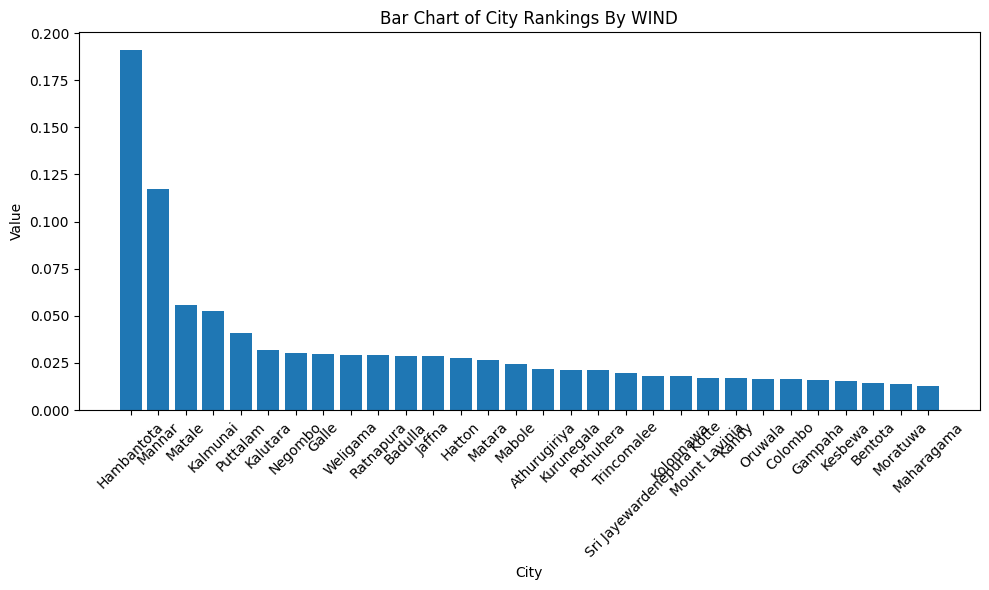

In [1033]:
import matplotlib.pyplot as plt


# Plotting a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(Sorted_Ranking['City'], Sorted_Ranking['Value'])
plt.xlabel('City')
plt.ylabel('Value')
plt.title('Bar Chart of City Rankings By WIND')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Optional: Adjust layout
plt.show()

# SOLAR


In [1034]:
solar_features = ['terrain', 'population_density', 'closest_highway',
       'nearby_housecount', 'daylight','high_radiation_days_percentage','solar_energy_loss_mean']

import itertools

pairs = list(itertools.combinations(solar_features, 2))
print(pairs)
nFeatures = len(pairs)
print(nFeatures)

[('terrain', 'population_density'), ('terrain', 'closest_highway'), ('terrain', 'nearby_housecount'), ('terrain', 'daylight'), ('terrain', 'high_radiation_days_percentage'), ('terrain', 'solar_energy_loss_mean'), ('population_density', 'closest_highway'), ('population_density', 'nearby_housecount'), ('population_density', 'daylight'), ('population_density', 'high_radiation_days_percentage'), ('population_density', 'solar_energy_loss_mean'), ('closest_highway', 'nearby_housecount'), ('closest_highway', 'daylight'), ('closest_highway', 'high_radiation_days_percentage'), ('closest_highway', 'solar_energy_loss_mean'), ('nearby_housecount', 'daylight'), ('nearby_housecount', 'high_radiation_days_percentage'), ('nearby_housecount', 'solar_energy_loss_mean'), ('daylight', 'high_radiation_days_percentage'), ('daylight', 'solar_energy_loss_mean'), ('high_radiation_days_percentage', 'solar_energy_loss_mean')]
21


In [1035]:
import random
import ahpy

random.seed(random_seed_value)

def generate_random_array(size, min_value, max_value):
    if size <= 0 or max_value <= min_value:
        raise ValueError("Invalid input parameters")

    random_array = [random.randint(min_value, max_value) for _ in range(size)]
    return random_array

error = 10

while error > 0.1 :
  solar_parameters = generate_random_array(nFeatures, 1, 9)

  Comparison = dict(zip(pairs, solar_parameters))

  all  = ahpy.Compare(name='all', comparisons=Comparison, precision=3, random_index='dd')
  error = all.consistency_ratio

  if error < 0.1:
    finalvalues = solar_parameters
    break;

print("final solar values :",finalvalues)

final solar values : [4, 7, 5, 5, 7, 6, 4, 3, 3, 8, 6, 3, 2, 3, 9, 1, 4, 2, 3, 3, 1]


In [1036]:
Values = finalvalues
#Values = [6, 9, 5, 1/2, 1/3, 2, 2, 1/9, 1/8, 1/2, 1/9, 1/8, 1/6, 1/6, 1]
#Values = [4, 7, 5, 5, 7, 6, 4, 3, 3, 8, 6, 3, 2, 3, 9, 1, 4, 2, 3, 3, 1]
Comparison = dict(zip(pairs, Values))
print(Comparison)

{('terrain', 'population_density'): 4, ('terrain', 'closest_highway'): 7, ('terrain', 'nearby_housecount'): 5, ('terrain', 'daylight'): 5, ('terrain', 'high_radiation_days_percentage'): 7, ('terrain', 'solar_energy_loss_mean'): 6, ('population_density', 'closest_highway'): 4, ('population_density', 'nearby_housecount'): 3, ('population_density', 'daylight'): 3, ('population_density', 'high_radiation_days_percentage'): 8, ('population_density', 'solar_energy_loss_mean'): 6, ('closest_highway', 'nearby_housecount'): 3, ('closest_highway', 'daylight'): 2, ('closest_highway', 'high_radiation_days_percentage'): 3, ('closest_highway', 'solar_energy_loss_mean'): 9, ('nearby_housecount', 'daylight'): 1, ('nearby_housecount', 'high_radiation_days_percentage'): 4, ('nearby_housecount', 'solar_energy_loss_mean'): 2, ('daylight', 'high_radiation_days_percentage'): 3, ('daylight', 'solar_energy_loss_mean'): 3, ('high_radiation_days_percentage', 'solar_energy_loss_mean'): 1}


In [1037]:
all_final  = ahpy.Compare(name='all', comparisons=Comparison, precision=3, random_index='dd')

print(all_final.target_weights)

solar_weights = all_final.target_weights

print(all_final.consistency_ratio)

{'terrain': 0.439, 'population_density': 0.225, 'closest_highway': 0.129, 'daylight': 0.073, 'nearby_housecount': 0.07, 'solar_energy_loss_mean': 0.032, 'high_radiation_days_percentage': 0.031}
0.089


In [1038]:
# Initialize a dictionary to store the weighted sums
weighted_sums = {}

# Iterate through each city name
for city in city_names:
    weighted_sum = (
        weightsterrain[city] * solar_weights ['terrain'] + weightspopulation_density[city] * solar_weights ['population_density'] +
        weightsclosest_highway[city] * solar_weights ['closest_highway'] + weightsnearby_housecount[city] * solar_weights ['nearby_housecount'] +
        weightsdaylight[city] * solar_weights ['daylight'] + weightshigh_radiation_days_percentage[city] * solar_weights ['high_radiation_days_percentage'] +
        weightssolar_energy_loss_mean[city] * solar_weights ['solar_energy_loss_mean']
    )
    weighted_sums[city] = weighted_sum


Ranking = pd.DataFrame(list(weighted_sums.items()), columns=['City', 'Value'])

# Sort the DataFrame by 'roi' in descending order
Sorted_Ranking = Ranking.sort_values(by='Value', ascending=False)

# Print the sorted DataFrame
print(Sorted_Ranking)

                         City     Value
23                     Mannar  0.141238
28                 Hambantota  0.104598
9                    Kalmunai  0.063850
22                     Matale  0.059734
7                     Negombo  0.037271
18                   Puttalam  0.035133
11                      Galle  0.032422
12                     Jaffna  0.030961
20                   Kalutara  0.030699
26                     Mabole  0.029735
13               Athurugiriya  0.027521
5                   Ratnapura  0.027445
14                   Weligama  0.026998
27                     Hatton  0.025410
15                     Matara  0.024360
16                  Kolonnawa  0.024177
8   Sri Jayewardenepura Kotte  0.023773
1               Mount Lavinia  0.023191
0                     Colombo  0.022085
19                    Badulla  0.021519
25                 Kurunegala  0.020667
24                  Pothuhera  0.020317
2                     Kesbewa  0.020267
10                Trincomalee  0.018886


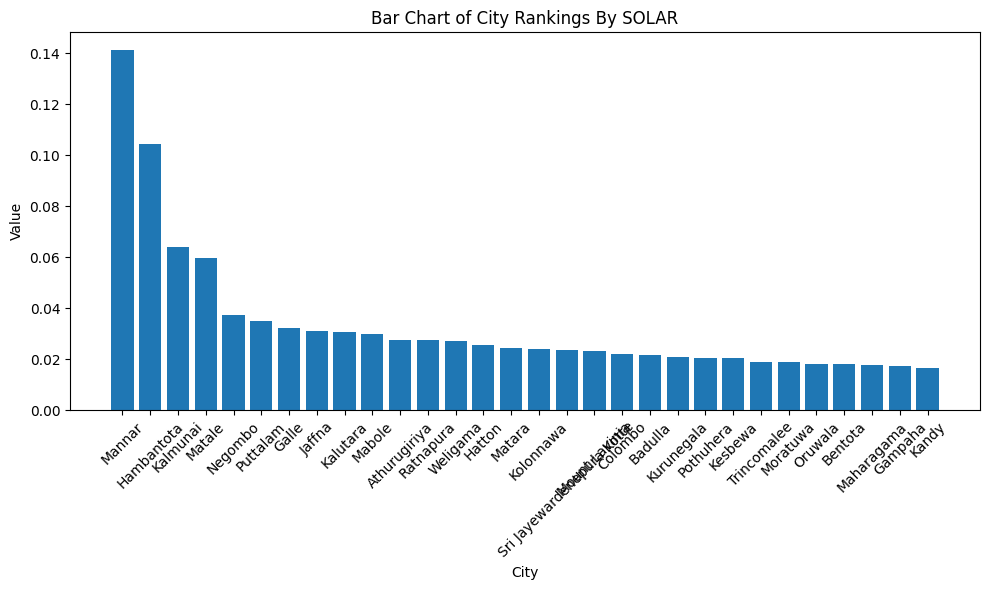

In [1039]:
import matplotlib.pyplot as plt


# Plotting a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(Sorted_Ranking['City'], Sorted_Ranking['Value'])
plt.xlabel('City')
plt.ylabel('Value')
plt.title('Bar Chart of City Rankings By SOLAR')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Optional: Adjust layout
plt.show()